<a href="https://colab.research.google.com/github/VyshnaviPothamsetti/MachineLearning/blob/main/LogisticRegression(penguins).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('/content/penguins.csv')
data.tail()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [3]:
data.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [4]:
data['bill_length_mm'].replace(np.NaN,data['bill_length_mm'].mean(), inplace=True)
data['bill_depth_mm'].replace(np.NaN,data['bill_depth_mm'].mean(), inplace=True)
data['flipper_length_mm'].replace(np.NaN,data['flipper_length_mm'].mean(), inplace=True)
data['body_mass_g'].replace(np.NaN,data['body_mass_g'].mean(), inplace=True)
data['sex'].replace(np.NaN,data['sex'].mode()[0],inplace=True)

In [5]:
data.isnull().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [6]:
data.species[data.species == 'Adelie'] = 0
data.species[data.species == 'Chinstrap'] = 2
data.species[data.species == 'Gentoo']=1
data.head()

<ipython-input-6-90769192f1de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.species[data.species == 'Adelie'] = 0
<ipython-input-6-90769192f1de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.species[data.species == 'Chinstrap'] = 2
<ipython-input-6-90769192f1de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.species[data.species == 'Gentoo']=1


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,0,Torgersen,39.10000,18.70000,181.000000,3750.000000,male,2007
1,2,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,female,2007
2,3,0,Torgersen,40.30000,18.00000,195.000000,3250.000000,female,2007
3,4,0,Torgersen,43.92193,17.15117,200.915205,4201.754386,male,2007
4,5,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,female,2007


In [9]:
data['island'].unique()
data.island[data.island == 'Torgersen'] =0
data.island[data.island == 'Biscoe'] = 1
data.island[data.island == 'Dream'] = 2
data.sex[data.sex == 'male'] =0
data.sex[data.sex == 'female'] = 1

<ipython-input-9-0c223f6ba0f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.island[data.island == 'Torgersen'] =0
<ipython-input-9-0c223f6ba0f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.island[data.island == 'Biscoe'] = 1
<ipython-input-9-0c223f6ba0f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.island[data.island == 'Dream'] = 2
<ipython-input-9-0c223f6ba0f0>:5: SettingWithCopyWarning: 
A value is tryin

In [40]:
data['species']=data['species'].astype(int)
data['sex']=data['sex'].astype(int)
data['island']=data['island'].astype(int)
data.dtypes

rowid                  int64
species                int64
island                 int64
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
year                   int64
dtype: object

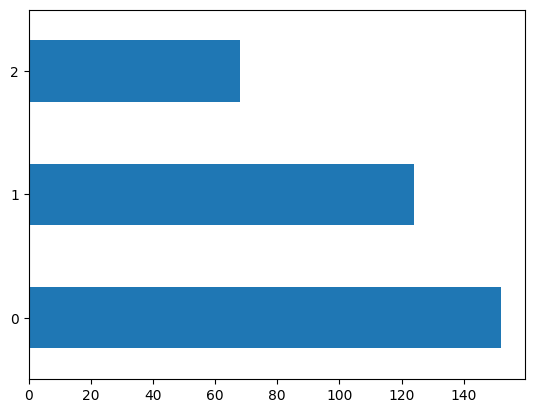

In [41]:
data['species'].value_counts().plot(kind='barh')
plt.show()

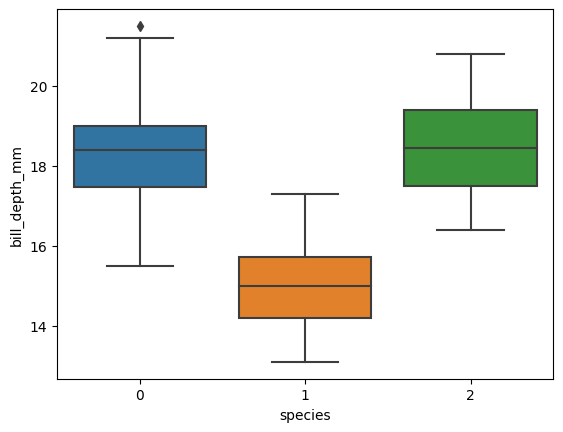

In [42]:
sns.boxplot(data=data,x="species",y="bill_depth_mm")
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


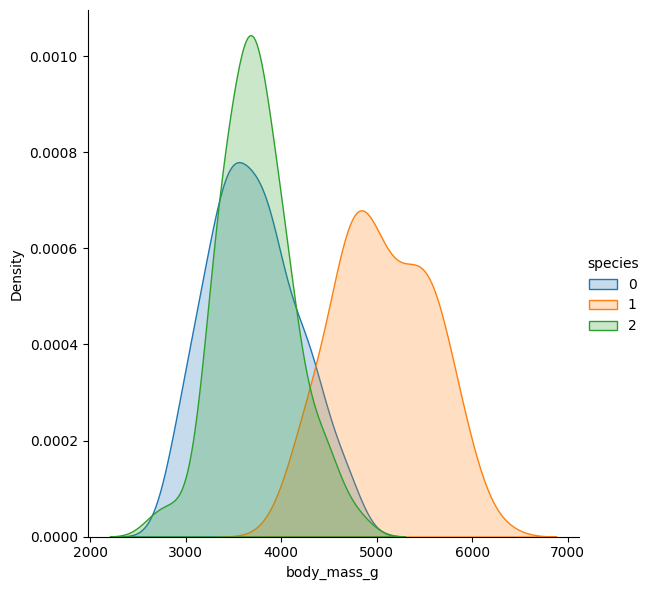

In [43]:
sns.FacetGrid(data,hue="species",height=6).map(sns.kdeplot, "body_mass_g",shade=True).add_legend()
plt.show()

In [44]:
x=data.drop('species',axis=1).values
y=data['species'].values

In [45]:
from sklearn import preprocessing
x=np.nan_to_num(x)
y=np.nan_to_num(y)

In [46]:
x.shape,y.shape

((344, 8), (344,))

In [47]:
y=y.reshape(-1,1)
x.shape,y.shape

((344, 8), (344, 1))

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)
x_train.shape,x_test.shape

((240, 8), (104, 8))

In [120]:
model=LogisticRegression(C=0.5)
model.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5)

In [121]:
y_pred=model.predict(x_test)
y_pred

array([2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 1, 2, 0,
       0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1,
       0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0])

In [122]:
model.score(x_test,y_test)

0.9903846153846154

In [123]:
confusion_matrix(y_test,y_pred)

array([[51,  0,  0],
       [ 0, 35,  1],
       [ 0,  0, 17]])

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      0.97      0.99        36
           2       0.94      1.00      0.97        17

    accuracy                           0.99       104
   macro avg       0.98      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

